In [120]:
# importing all libraries 
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import numpy as np
import os
from pathlib import Path
from dotenv import load_dotenv
load_dotenv()



import warnings
warnings.filterwarnings('ignore')


import yfinance as yf

In [121]:
# Importing the tickers from Yahoo Finance to conduct our analysis 

Ticker = ["SCG.AX","CHC.AX","LLC.AX","SGP.AX","DXS.AX","MGR.AX","LIC.AX","AVJ.AX","GOZ.AX","GMG.AX"]

# Conducting a loop to get the Info for each one of the tickers 

Ticker_AX=[]
Property_Fund_Co_Summary=[]
for ticker in Ticker:
    ticker_AX=yf.Ticker(ticker)
#     print(ticker_AX)
    ticker_info=ticker_AX.info['longBusinessSummary']
    Property_Fund_Co_Summary.append(ticker_info)
#     print(ticker_info)

Property_Fund_Co_Summary

['Scentre Group (ASX Code: SCG) is the owner and operator of Westfield in Australia and New Zealand with interests in 42 Westfield Living Centres, encompassing approximately 12,000 outlets.',
 "With over 30 years' experience in property investment and funds management, we're one of Australia's leading fully integrated property groups. We use our property expertise to access, deploy, manage and invest equity across our core sectors Â\x96 office, retail, industrial & logistics and social infrastructure. Operating with prudence, we've carefully curated a $41.8 billion plus diverse portfolio of over 1100 high quality, long leased properties. Partnership and financial discipline are at the heart of our approach. Acting in the best interest of customers and communities, we combine insight and inventiveness to unlock hidden value. Taking a long term view, our $6.8 billion development pipeline delivers sustainable, technologically enabled projects for our customers. The impacts of what we do a

In [122]:
# Pulling data from Yahoo finance for the past 10 years for Closing price only! 

data1 = yf.download('SCG.AX CHC.AX LLC.AX SGP.AX DXS.AX MGR.AX LIC.AX AVJ.AX GOZ.AX GMG.AX', period='10y')['Close']

[*********************100%***********************]  10 of 10 completed


In [123]:
# Showing the pulled data 
data1.head(10)

,AVJ.AX,CHC.AX,DXS.AX,GMG.AX,GOZ.AX,LIC.AX,LLC.AX,MGR.AX,SCG.AX,SGP.AX
Date,,,,,,,,,,
2011-08-29,0.397767,1.870,4.919990,3.250,1.880112,1.218746,8.18,1.135,2.58,2.95
2011-08-30,0.402678,1.900,5.099989,3.250,1.880112,1.218746,8.25,1.185,2.59,3.04
2011-08-31,0.402678,1.950,5.159989,3.250,1.860527,1.218746,8.40,1.205,2.62,2.99
2011-09-01,0.402678,1.990,5.189989,3.275,1.811566,1.265621,8.42,1.200,2.61,3.05
2011-09-02,NaN,1.925,5.159989,3.125,1.860527,1.265621,8.31,1.180,2.54,3.03
2011-09-05,0.407589,1.885,5.069989,3.025,1.860527,1.312495,7.89,1.165,2.50,2.97
2011-09-06,0.392857,1.880,5.069989,2.950,1.860527,1.312495,7.72,1.155,2.42,2.92
2011-09-07,0.392857,1.880,5.159989,3.075,1.821358,1.312495,7.90,1.185,2.43,2.94
2011-09-08,0.392857,1.950,5.189989,3.150,1.811566,1.265621,8.06,1.165,2.41,2.95


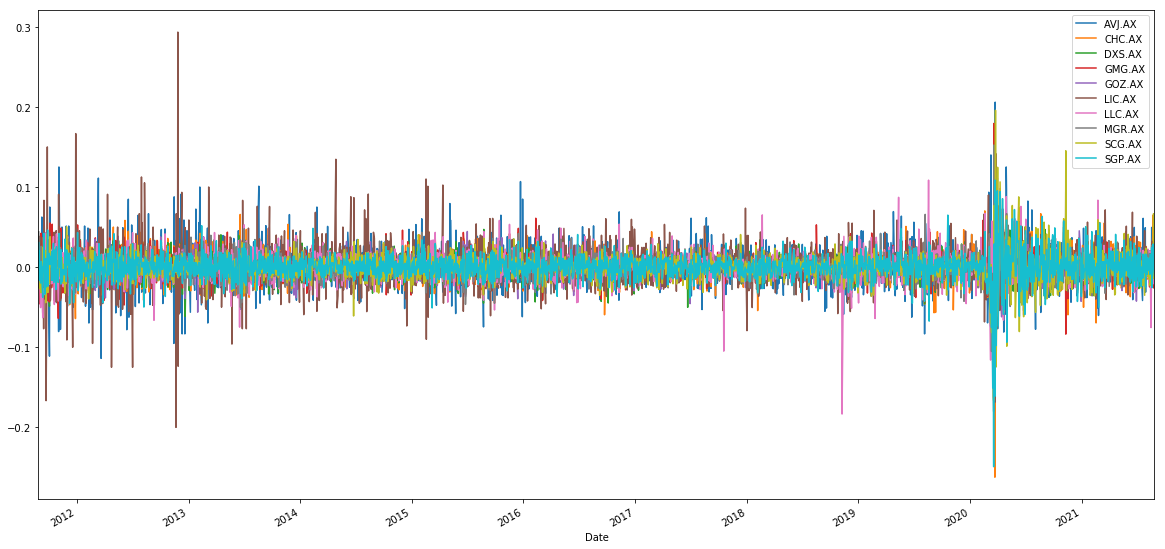

In [124]:
# Plotting the Individual tickers for Percent change

#data1.pct_change().plot(figsize=(20, 10))
pct = data1.pct_change()
pct.plot(figsize=(20, 10))

# Conducting cumulative return for all stocks
pct_cumulative = np.cumprod(1+pct)-1

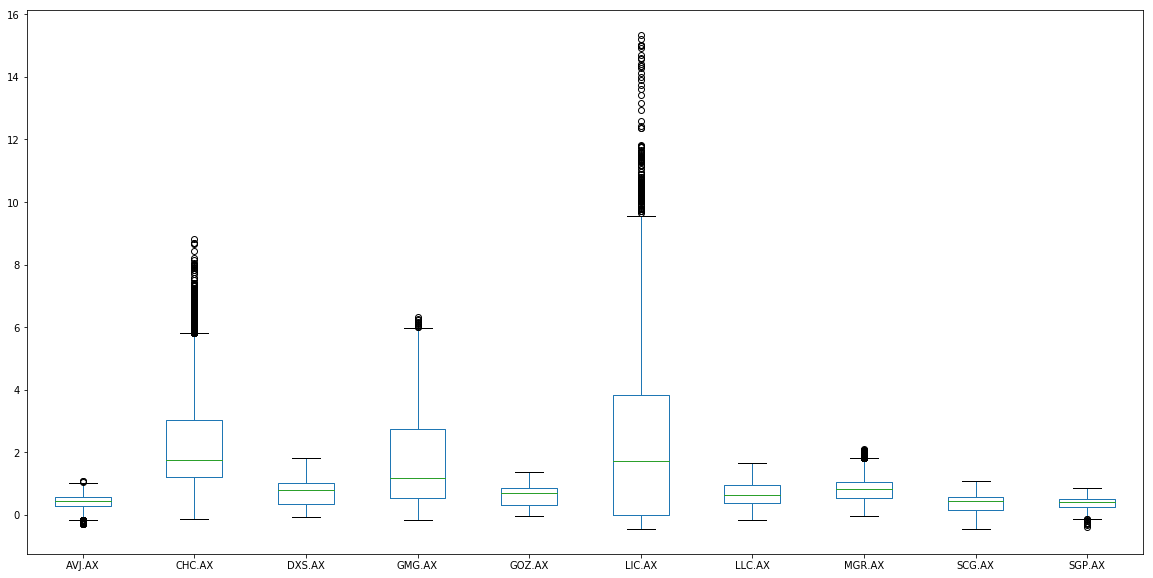

In [125]:
# Box plot to visually show risk basd on cumulative return
pct_cumulative.plot.box(figsize=(20,10))

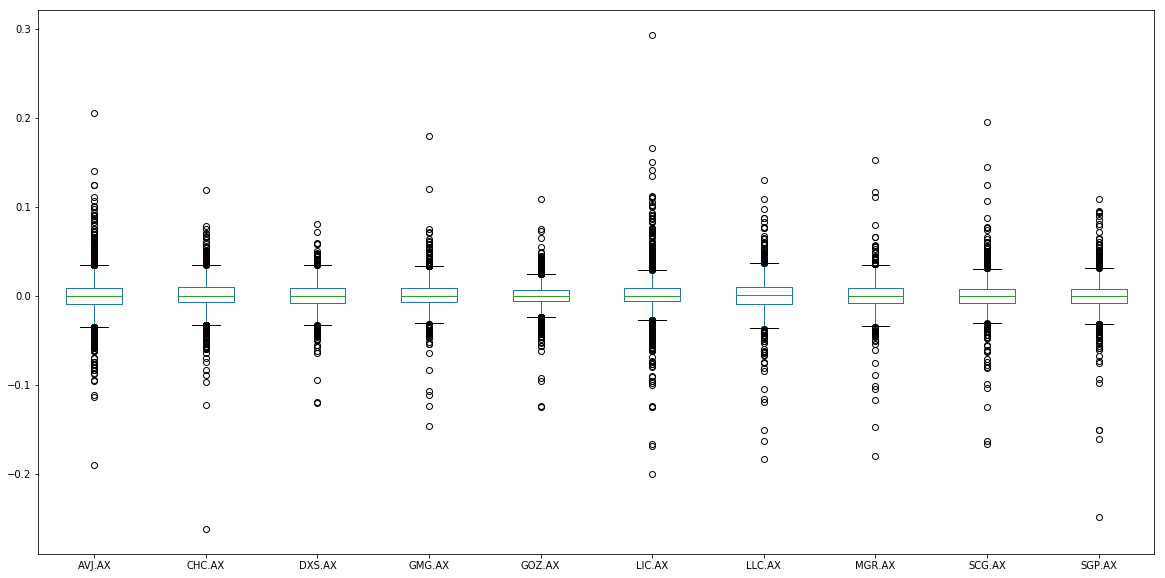

In [126]:
# Box plot to visually show risk based on Percent change 
pct.plot.box(figsize=(20,10))

In [127]:
# Calculate the standard deviations of all tickers
pct_std = pct.std()
pct.std()

AVJ.AX    0.022398
CHC.AX    0.017769
DXS.AX    0.014538
GMG.AX    0.015814
GOZ.AX    0.013030
LIC.AX    0.023709
LLC.AX    0.018223
MGR.AX    0.016133
SCG.AX    0.017126
SGP.AX    0.017120
dtype: float64

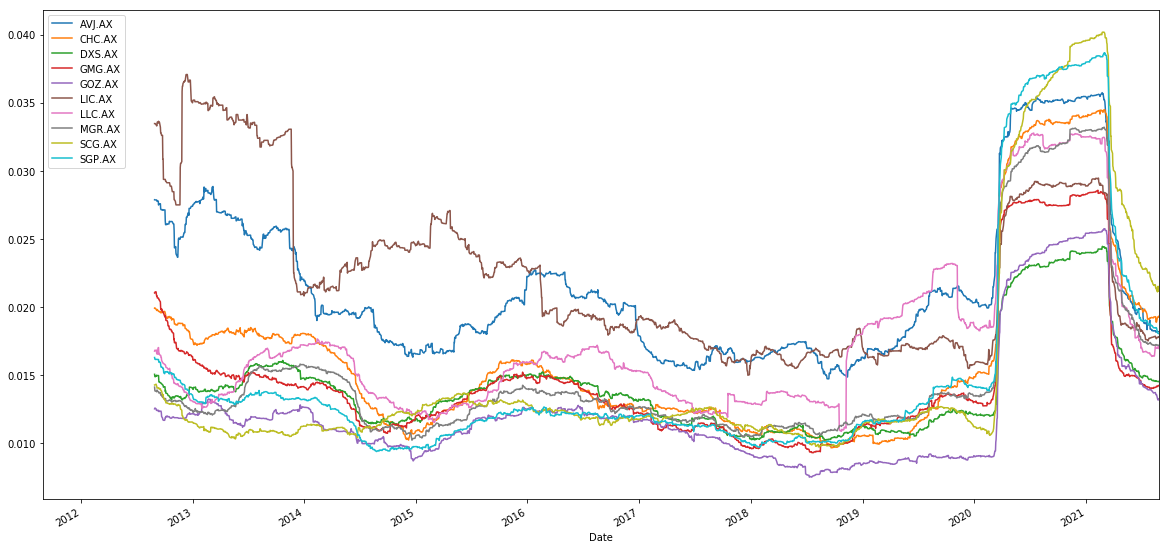

In [128]:
# Calculate the rolling standard deviation for all portfolios using a 252-day window
pct.rolling(window=252).std().plot(figsize=[20,10])

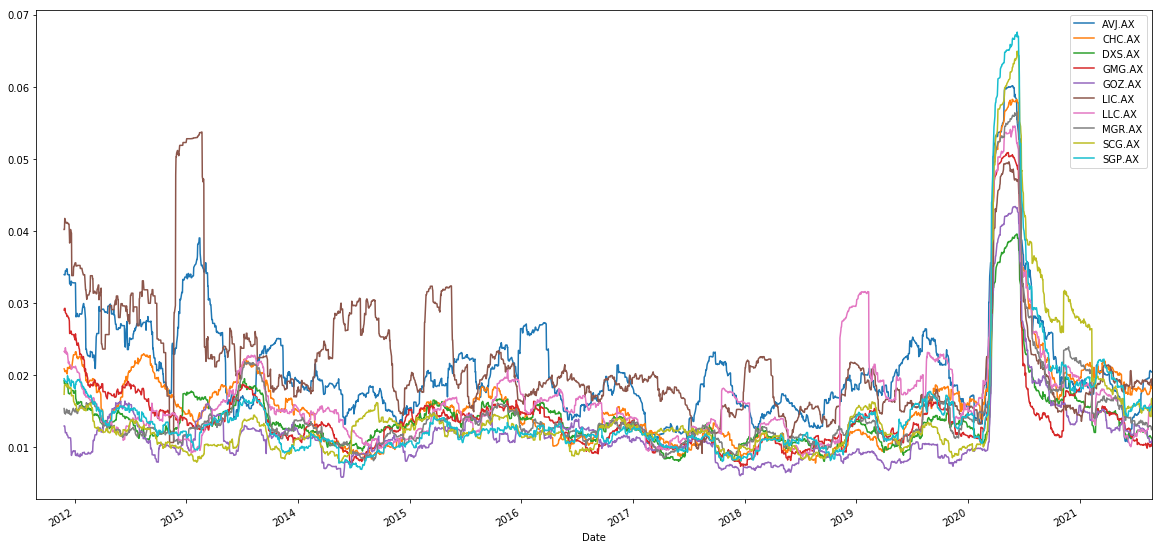

In [129]:
# Calculate the rolling standard deviation for all portfolios using a 63-day window
pct.rolling(window=63).std().plot(figsize=[20,10])

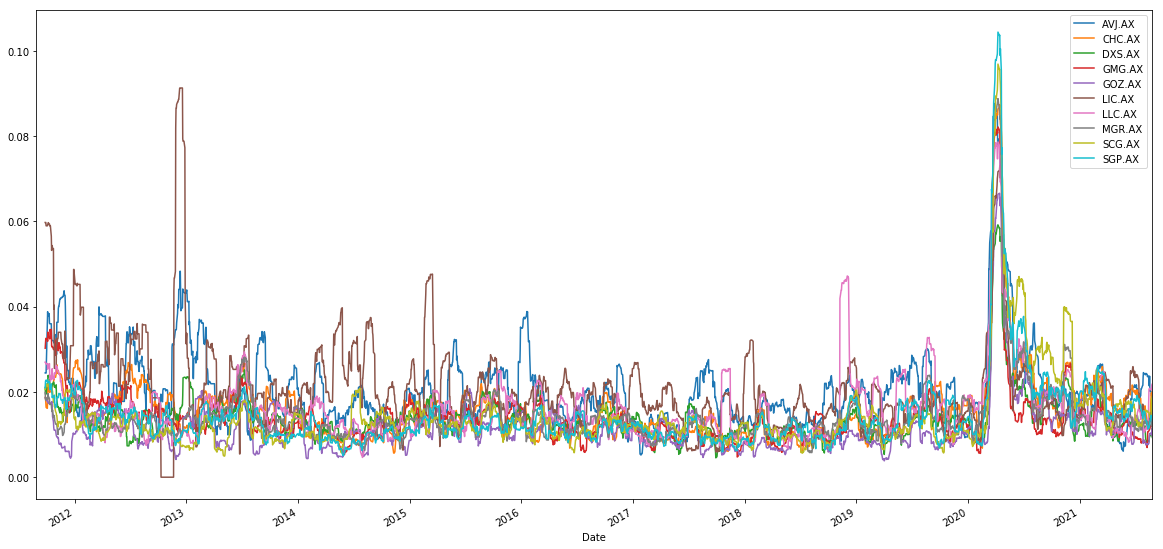

In [130]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
pct.rolling(window=21).std().plot(figsize=[20,10])

In [131]:
# Display the percent change for the tickers 
pct.head()

,AVJ.AX,CHC.AX,DXS.AX,GMG.AX,GOZ.AX,LIC.AX,LLC.AX,MGR.AX,SCG.AX,SGP.AX
Date,,,,,,,,,,
2011-08-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-30,0.012346,0.016043,0.036585,0.000000,0.000000,0.000000,0.008557,0.044053,0.003876,0.030508
2011-08-31,0.000000,0.026316,0.011765,0.000000,-0.010417,0.000000,0.018182,0.016878,0.011583,-0.016447
2011-09-01,0.000000,0.020513,0.005814,0.007692,-0.026316,0.038462,0.002381,-0.004149,-0.003817,0.020067
2011-09-02,0.000000,-0.032663,-0.005780,-0.045802,0.027027,0.000000,-0.013064,-0.016667,-0.026820,-0.006557


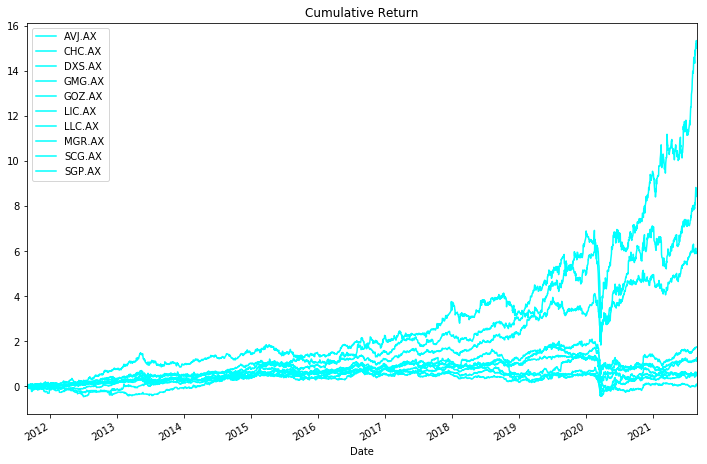

In [132]:
# Plotting cumulative return for the tickers 

pct_cumulative.plot.line(title="Cumulative Return",figsize=(12,8), color = 'cyan')

In [133]:
# Display the index for pct to show the data
pct.index

DatetimeIndex(['2011-08-29', '2011-08-30', '2011-08-31', '2011-09-01',
               '2011-09-02', '2011-09-05', '2011-09-06', '2011-09-07',
               '2011-09-08', '2011-09-09',
               ...
               '2021-08-16', '2021-08-17', '2021-08-18', '2021-08-19',
               '2021-08-20', '2021-08-23', '2021-08-24', '2021-08-25',
               '2021-08-26', '2021-08-27'],
              dtype='datetime64[ns]', name='Date', length=2532, freq=None)

In [134]:
# Display the tickers closing proce and date
pct.head()

,AVJ.AX,CHC.AX,DXS.AX,GMG.AX,GOZ.AX,LIC.AX,LLC.AX,MGR.AX,SCG.AX,SGP.AX
Date,,,,,,,,,,
2011-08-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-30,0.012346,0.016043,0.036585,0.000000,0.000000,0.000000,0.008557,0.044053,0.003876,0.030508
2011-08-31,0.000000,0.026316,0.011765,0.000000,-0.010417,0.000000,0.018182,0.016878,0.011583,-0.016447
2011-09-01,0.000000,0.020513,0.005814,0.007692,-0.026316,0.038462,0.002381,-0.004149,-0.003817,0.020067
2011-09-02,0.000000,-0.032663,-0.005780,-0.045802,0.027027,0.000000,-0.013064,-0.016667,-0.026820,-0.006557


In [135]:
# Plotting the cumulative return for individual tickers 
pct_cumulative.sort_values('Date').hvplot(width=1000, height=300)

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

In [136]:
# Renaming the cumulative return variable to reset the index with the new columns 'Ticker','Date','Return' 
rename = pct_cumulative.unstack().reset_index()

In [137]:
# Rename 'Ticker','Date','Return' Column to be specific to this portfolio.
rename.columns=['Ticker','Date','Return']

In [138]:
# Display the new index
rename.head()

,Ticker,Date,Return
0,AVJ.AX,2011-08-29,NaN
1,AVJ.AX,2011-08-30,0.012346
2,AVJ.AX,2011-08-31,0.012346
3,AVJ.AX,2011-09-01,0.012346
4,AVJ.AX,2011-09-02,0.012346


In [139]:
# Display the data of the tickers 
pct_cumulative.head()

,AVJ.AX,CHC.AX,DXS.AX,GMG.AX,GOZ.AX,LIC.AX,LLC.AX,MGR.AX,SCG.AX,SGP.AX
Date,,,,,,,,,,
2011-08-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-30,0.012346,0.016043,0.036585,0.000000,0.000000,0.000000,0.008557,0.044053,0.003876,0.030508
2011-08-31,0.012346,0.042781,0.048780,0.000000,-0.010417,0.000000,0.026895,0.061674,0.015504,0.013559
2011-09-01,0.012346,0.064171,0.054878,0.007692,-0.036458,0.038462,0.029340,0.057269,0.011628,0.033898
2011-09-02,0.012346,0.029412,0.048780,-0.038462,-0.010417,0.038462,0.015892,0.039648,-0.015504,0.027119


In [140]:
# imports the required libraries 
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import numpy as np
import os
from pathlib import Path
from dotenv import load_dotenv
load_dotenv()



import warnings
warnings.filterwarnings('ignore')



In [141]:
#Plotting the individual tickers 
rename.hvplot(x='Date', groupby = 'Ticker', ylabel='Returns', subplots=True, width=700, height=300)

:DynamicMap   [Ticker]
   :Curve   [Date]   (Return)

In [142]:
# Display data 
rename.head()

,Ticker,Date,Return
0,AVJ.AX,2011-08-29,NaN
1,AVJ.AX,2011-08-30,0.012346
2,AVJ.AX,2011-08-31,0.012346
3,AVJ.AX,2011-09-01,0.012346
4,AVJ.AX,2011-09-02,0.012346


In [143]:
# Distributing weights among all shares with 10% each 
weights = [.10, .10, .10, .10,.10, .10, .10, .10, .10, .10]
# Calculating acumulative return for the whole portfolio 
port_return = pct_cumulative.mul(weights, axis=1).sum(axis=1)
port_return.head()

Date
2011-08-29    0.000000
2011-08-30    0.015197
2011-08-31    0.021112
2011-09-01    0.027323
2011-09-02    0.014728
dtype: float64

In [144]:
#set intital investment $1m as at 26 August 2011
initial_investment = 1000000
Cumulative_Port_Return = port_return*initial_investment
Cumulative_Port_Return.head()

Date
2011-08-29        0.000000
2011-08-30    15196.906571
2011-08-31    21112.262219
2011-09-01    27322.579875
2011-09-02    14727.643820
dtype: float64

In [145]:
# combining the cumulative returns for all tickers along with My portfolio return

all_returns= pd.concat([pct_cumulative, port_return], axis='columns', join='inner')
all_returns

all_returns.rename(columns={0:'My Portfolio'}, inplace=True)
all_returns.head()

,AVJ.AX,CHC.AX,DXS.AX,GMG.AX,GOZ.AX,LIC.AX,LLC.AX,MGR.AX,SCG.AX,SGP.AX,My Portfolio
Date,,,,,,,,,,,
2011-08-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
2011-08-30,0.012346,0.016043,0.036585,0.000000,0.000000,0.000000,0.008557,0.044053,0.003876,0.030508,0.015197
2011-08-31,0.012346,0.042781,0.048780,0.000000,-0.010417,0.000000,0.026895,0.061674,0.015504,0.013559,0.021112
2011-09-01,0.012346,0.064171,0.054878,0.007692,-0.036458,0.038462,0.029340,0.057269,0.011628,0.033898,0.027323
2011-09-02,0.012346,0.029412,0.048780,-0.038462,-0.010417,0.038462,0.015892,0.039648,-0.015504,0.027119,0.014728


In [146]:
#10years cumulative return for our evenly weighted combined property shares portfolio
#port_return.hvplot(ylabel='Returns', subplots=True, width=800, height=400)

In [147]:
#10years cumulative return for our evenly weighted combined property shares portfolio
Cumulative_Port_Return.hvplot(ylabel='Returns', subplots=True, width=800, height=400,color = 'purple').opts(yformatter="%f")

:Curve   [Date]   (0)

In [148]:
# Resetting the index
all_returns.unstack().reset_index()

,level_0,Date,0
0,AVJ.AX,2011-08-29,NaN
1,AVJ.AX,2011-08-30,0.012346
2,AVJ.AX,2011-08-31,0.012346
3,AVJ.AX,2011-09-01,0.012346
4,AVJ.AX,2011-09-02,0.012346
5,AVJ.AX,2011-09-05,0.024693
6,AVJ.AX,2011-09-06,-0.012344
7,AVJ.AX,2011-09-07,-0.012344
8,AVJ.AX,2011-09-08,-0.012344
9,AVJ.AX,2011-09-09,0.049383


In [149]:
# Rename `Date` Column to be specific to this portfolio.
rename.rename(columns={1:'Date'}, inplace=True)

In [150]:
# Display the data 
rename.head()

,Ticker,Date,Return
0,AVJ.AX,2011-08-29,NaN
1,AVJ.AX,2011-08-30,0.012346
2,AVJ.AX,2011-08-31,0.012346
3,AVJ.AX,2011-09-01,0.012346
4,AVJ.AX,2011-09-02,0.012346


In [151]:
# Setting new index as 'Date'
mc_data = rename.set_index('Date')

In [152]:
# Display data with new index
mc_data.head()

,Ticker,Return
Date,,
2011-08-29,AVJ.AX,NaN
2011-08-30,AVJ.AX,0.012346
2011-08-31,AVJ.AX,0.012346
2011-09-01,AVJ.AX,0.012346
2011-09-02,AVJ.AX,0.012346


In [153]:
# Setting columns as 'Ticker','Return'
mc_data.columns=['Ticker','Return']
mc_data.index = mc_data.index.date

In [154]:
# Setting Index as 'Date'
mc_data.index.set_names(names="Date",inplace=True)

In [155]:
# Display sample data
mc_data.head()

,Ticker,Return
Date,,
2011-08-29,AVJ.AX,NaN
2011-08-30,AVJ.AX,0.012346
2011-08-31,AVJ.AX,0.012346
2011-09-01,AVJ.AX,0.012346
2011-09-02,AVJ.AX,0.012346


In [156]:
# Import Libraries for MCSimulation
from MCForecastTools import MCSimulation
data1.columns

Index(['AVJ.AX', 'CHC.AX', 'DXS.AX', 'GMG.AX', 'GOZ.AX', 'LIC.AX', 'LLC.AX',
       'MGR.AX', 'SCG.AX', 'SGP.AX'],
      dtype='object')

In [157]:
# Setting multi index for columns
data1.head()
close_list=['close']*len(data1.columns)
index=pd.MultiIndex.from_tuples(zip(list(data1.columns),close_list))
new_df=data1.copy()
new_df.columns=index
new_df

,AVJ.AX,CHC.AX,DXS.AX,GMG.AX,GOZ.AX,LIC.AX,LLC.AX,MGR.AX,SCG.AX,SGP.AX
,close,close,close,close,close,close,close,close,close,close
Date,,,,,,,,,,
2011-08-29,0.397767,1.870000,4.919990,3.250000,1.880112,1.218746,8.18,1.135,2.58,2.95
2011-08-30,0.402678,1.900000,5.099989,3.250000,1.880112,1.218746,8.25,1.185,2.59,3.04
2011-08-31,0.402678,1.950000,5.159989,3.250000,1.860527,1.218746,8.40,1.205,2.62,2.99
2011-09-01,0.402678,1.990000,5.189989,3.275000,1.811566,1.265621,8.42,1.200,2.61,3.05
2011-09-02,NaN,1.925000,5.159989,3.125000,1.860527,1.265621,8.31,1.180,2.54,3.03
2011-09-05,0.407589,1.885000,5.069989,3.025000,1.860527,1.312495,7.89,1.165,2.50,2.97
2011-09-06,0.392857,1.880000,5.069989,2.950000,1.860527,1.312495,7.72,1.155,2.42,2.92
2011-09-07,0.392857,1.880000,5.159989,3.075000,1.821358,1.312495,7.90,1.185,2.43,2.94


In [158]:
# Get 10 years' worth of historical data for all tickers
# (use a limit=500 parameter to call the most recent 2520 days of data)

mcs = MCSimulation(portfolio_data = new_df, weights = [.10, .10, .10, .10,.10, .10, .10, .10, .10, .10], num_simulation = 500, num_trading_days = 252*10)

In [159]:
# Display sample data
mcs.portfolio_data.head()

AVJ.AX              CHC.AX                 DXS.AX               \
               close daily_return  close daily_return     close daily_return   
Date                                                                           
2011-08-29  0.397767          NaN  1.870          NaN  4.919990          NaN   
2011-08-30  0.402678     0.012346  1.900     0.016043  5.099989     0.036585   
2011-08-31  0.402678     0.000000  1.950     0.026316  5.159989     0.011765   
2011-09-01  0.402678     0.000000  1.990     0.020513  5.189989     0.005814   
2011-09-02       NaN     0.000000  1.925    -0.032663  5.159989    -0.005780   

           GMG.AX                 GOZ.AX                 LIC.AX               \
            close daily_return     close daily_return     close daily_return   
Date                                                                           
2011-08-29  3.250          NaN  1.880112          NaN  1.218746          NaN   
2011-08-30  3.250     0.000000  1.880112     0.000000  1.218746     0.000000   
2011-08-31  3.250     0.000000  1.860527    -0.010417  1.218746     0.000000   
2011-09-01  3.275     0.007692  1.811566    -0.026316  1.265621     0.038462   
2011-09-02  3.125    -0.045802  1.860527     0.027027  1.265621     0.000000   

           LLC.AX              MGR.AX              SCG.AX              SGP.AX  \
            close daily_return  close daily_return  close daily_return  close   
Date                                                                            
2011-08-29   8.18          NaN  1.135          NaN   2.58          NaN   2.95   
2011-08-30   8.25     0.008557  1.185     0.044053   2.59     0.003876   3.04   
2011-08-31   8.40     0.018182  1.205     0.016878   2.62     0.011583   2.99   
2011-09-01   8.42     0.002381  1.200    -0.004149   2.61    -0.003817   3.05   
2011-09-02   8.31    -0.013064  1.180    -0.016667   2.54    -0.026820   3.03   

                         
           daily_return  
Date                     
2011-08-29          NaN  
2011-08-30     0.030508  
2011-08-31    -0.016447  
2011-09-01     0.020067  
2011-09-02    -0.006557

In [160]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
mcs.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.006521,1.007341,0.996134,1.010496,0.998118,1.006135,0.997265,0.998739,1.005578,0.999354,...,1.000019,1.005501,1.000324,1.002598,0.992019,0.994816,0.997430,0.997668,1.003661,0.992758
2,1.013507,1.001371,0.999903,1.012032,0.991758,1.004654,0.991876,0.996962,1.003715,1.000508,...,1.002978,1.004160,1.007370,0.998779,0.993070,1.002403,1.003381,0.989275,1.004836,0.978799
3,1.016117,0.998672,1.001981,1.016569,0.993976,1.011236,0.989464,1.003328,1.008882,1.001938,...,1.002729,0.999307,1.005932,1.009939,0.984288,1.003968,1.005818,0.992237,0.996888,0.979890
4,1.009159,1.000019,0.994518,1.015594,0.994340,1.011301,0.996002,1.010303,1.000687,1.011157,...,1.000864,0.997942,1.009655,1.006189,0.974094,0.993478,1.011038,0.999520,0.998550,0.972240
5,1.006063,1.008876,0.988941,1.013193,0.992900,1.014233,0.989337,1.010509,0.995614,1.011827,...,0.991893,1.000573,1.012802,1.011119,0.976950,0.993517,1.011596,1.004449,1.012350,0.979645
6,0.997936,1.007105,0.982992,1.016470,0.993819,1.014965,0.993000,1.008925,0.994640,1.009880,...,1.000495,1.013468,1.018090,1.016760,0.976089,0.997597,1.017020,0.991535,1.009032,0.974947
7,1.005037,1.003524,0.985249,1.011937,0.990291,1.005500,0.995456,1.008340,1.003845,1.012854,...,1.003069,1.013787,1.025470,1.010227,0.983043,0.995098,1.013793,0.993695,1.015849,0.960691
8,0.996026,1.009768,0.986871,1.022497,0.979420,1.000785,0.991413,1.010699,1.001930,1.015149,...,1.002459,1.019662,1.033140,1.002481,0.978111,0.992305,1.015385,1.001866,1.017125,0.955800
9,0.999950,1.007172,0.982433,1.016820,0.981539,1.006685,0.993848,1.019577,0.996447,1.021506,...,0.997912,1.018484,1.034737,1.001572,0.972558,0.989837,1.023508,1.007286,1.016485,0.968759


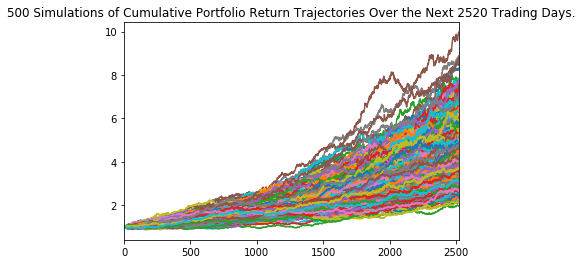

In [161]:
# Plotting simulation outcomes
sim = mcs.plot_simulation()
sim.get_figure().savefig("MCS.png",bbox_inches="tight")

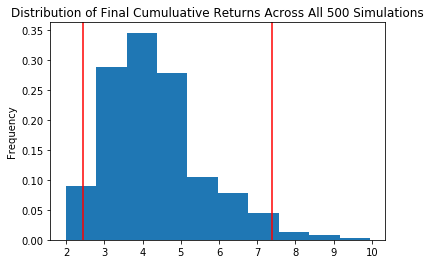

In [162]:
# Plot probability distribution and confidence intervals
mcs.plot_distribution()

In [163]:
# Fetch summary statistics from the Monte Carlo simulation results
# Print summary statistics
even_tbl=mcs.summarize_cumulative_return()
even_tbl

count           500.000000
mean              4.361630
std               1.270084
min               1.984325
25%               3.457828
50%               4.131499
75%               5.009523
max               9.956308
95% CI Lower      2.449654
95% CI Upper      7.384268
Name: 2520, dtype: float64

In [164]:
# Set initial investment
initial_investment = 1000000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $1,000,000
# YOUR CODE HERE!
ci_lower = round(even_tbl[8]*1000000,2)
ci_upper = round(even_tbl[9]*1000000,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $1000000 in the portfolio over the next 10 years will end within in the range of $2449653.67 and $7384267.95
